# Exploring the NASDAQOMX commoditiy indices

In [1]:
library(DBI)
library(plutoDbR)
library(plutoR)
library(tidyverse)
options("scipen"=999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")
source("/usr/share/pluto/goofy/misc.common.R")

library(ggthemes)
library(quantmod)
library(PerformanceAnalytics)

options(repr.plot.width=16, repr.plot.height=8)

nasdaqOmx <- NasdaqOmx()

In [2]:
nasdaqOmx$Meta() %>%
    inner_join(nasdaqOmx$TimeSeries()) %>%
    group_by(ID, NAME) %>%
    filter(NAME %like% '% Commodity %') %>%
    summarize(ST = min(TIME_STAMP), ET = max(TIME_STAMP)) %>%
    arrange(NAME) %>%
    print(n = Inf)

# Source:     lazy query [?? x 4]
# Database:   NORWAY:StockVizUs2:R
# Groups:     ID
# Ordered by: NAME
         ID NAME                                             ST        ET       
      <int> <chr>                                            <chr>     <chr>    
 1 13143745 NASDAQ Commodity Agriculture Index TR (NQCIACTR) 2012-04-… 2019-09-…
 2 13143747 NASDAQ Commodity Aluminum Index TR (NQCIALTR)    2012-04-… 2019-09-…
 3 13143750 NASDAQ Commodity Benchmark Index TR (NQCITR)     2012-04-… 2019-09-…
 4 13143753 NASDAQ Commodity Brent Crude Index TR (NQCICBTR) 2012-04-… 2019-09-…
 5 13143755 NASDAQ Commodity Cocoa Index TR (NQCICCTR)       2012-04-… 2019-09-…
 6 13143757 NASDAQ Commodity Coffee Index TR (NQCIKCTR)      2012-04-… 2019-09-…
 7 13143759 NASDAQ Commodity Copper Index TR (NQCICUTR)      2012-04-… 2019-09-…
 8 13143761 NASDAQ Commodity Corn Index TR (NQCICTR)         2012-04-… 2019-09-…
 9 13143770 NASDAQ Commodity Cotton Index TR (NQCICTTR)      2012-04-… 2019-09-…
10 1

### coffee or sugar?

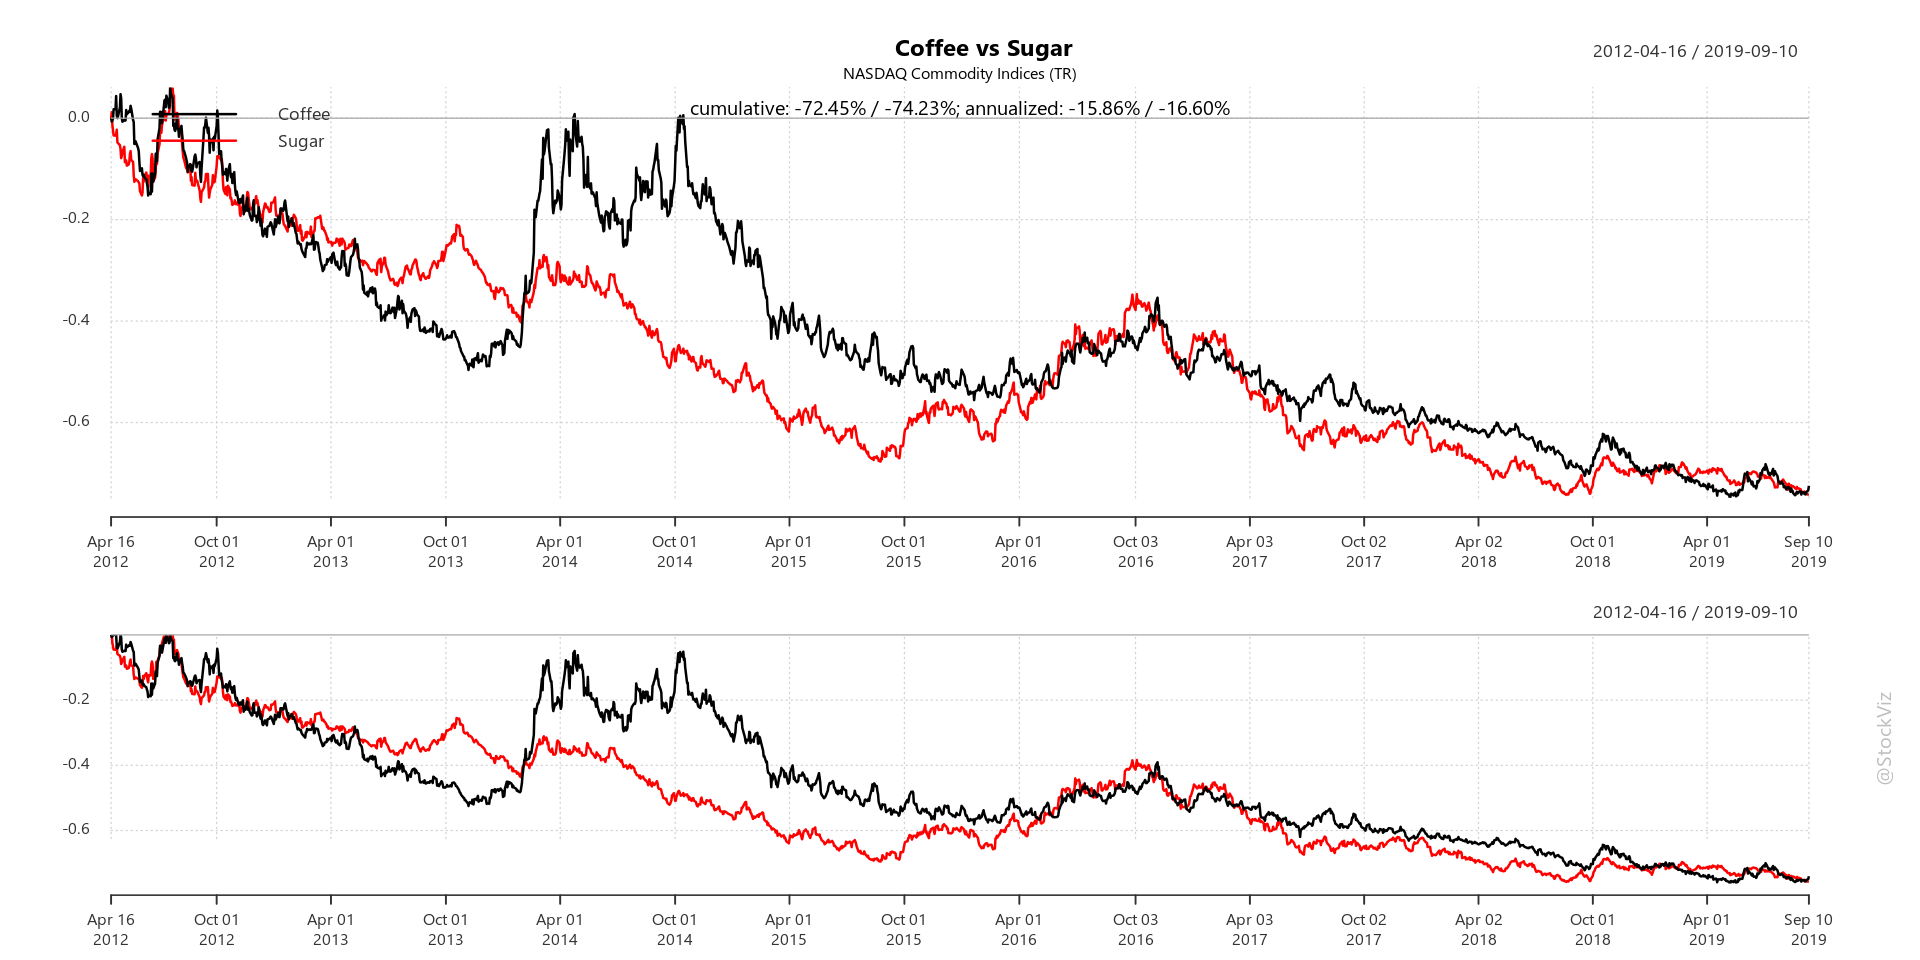

In [3]:
id1 <- 13143757 #NASDAQ Commodity Coffee Index TR (NQCIKCTR)
id2 <- 13143829 #NASDAQ Commodity Sugar Index TR (NQCISBTR)

name1 <- 'Coffee'
name2 <- 'Sugar'

nqVals1 <- nasdaqOmx$TimeSeries() %>%
    filter(ID == id1) %>%
    select(TIME_STAMP, CLOSE) %>%
    collect() %>%
    mutate(TIME_STAMP = as.Date(TIME_STAMP))

nqVals2 <- nasdaqOmx$TimeSeries() %>%
    filter(ID == id2) %>%
    select(TIME_STAMP, CLOSE) %>%
    collect() %>%
    mutate(TIME_STAMP = as.Date(TIME_STAMP))

nqRets <- merge(dailyReturn(xts(nqVals1$CLOSE, nqVals1$TIME_STAMP)), dailyReturn(xts(nqVals2$CLOSE, nqVals2$TIME_STAMP)))
names(nqRets) <- c(name1, name2)

Common.PlotCumReturns(nqRets, sprintf("%s vs %s", name1, name2), "NASDAQ Commodity Indices (TR)")

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)